In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD, RMSprop,Adam
from tensorflow.keras.utils import to_categorical, load_img, img_to_array
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import numpy as np
from keras.utils import np_utils
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense,Flatten, Dropout, Conv2D, MaxPooling2D

In [ ]:
train = ImageDataGenerator(rescale=1/255)
train_url = '/content/drive/MyDrive/AI/11_money/train'

validation = ImageDataGenerator(rescale=1/255)
validation_url = '/content/drive/MyDrive/AI/11_money/validation'

In [ ]:
train_generator = ImageDataGenerator(rotation_range = 10,
                                     zoom_range = 0.1,
                                     height_shift_range = 0.1,
                                     width_shift_range = 0.1,
                                     brightness_range = (0.9,1.1))
train_dataset = train_generator.flow_from_directory(train_url,
                                                    target_size = (150,150),
                                                    batch_size = 128,
                                                    class_mode = 'categorical')
validation_dataset = validation.flow_from_directory(validation_url,
                                                       target_size = (150,150),
                                                       batch_size = 128,
                                                       class_mode = 'categorical')

Found 55 images belonging to 11 classes.
Found 55 images belonging to 11 classes.


In [ ]:
train_dataset.class_indices

{'0.2k': 0,
 '0.5k': 1,
 '100k': 2,
 '10k': 3,
 '1k': 4,
 '200k': 5,
 '20k': 6,
 '2k': 7,
 '500k': 8,
 '50k': 9,
 '5k': 10}

In [ ]:
model = Sequential()
model.add(Conv2D(16,(3,3),activation = 'relu',padding='same',input_shape=(150,150,3)))
model.add(Conv2D(16,(3,3),activation = 'relu',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32,(3,3),activation = 'relu',padding='same'))
model.add(Conv2D(32,(3,3),activation = 'relu',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation = 'relu',padding='same'))
model.add(Conv2D(64,(3,3),activation = 'relu',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation = 'relu',padding='same'))
model.add(Conv2D(128,(3,3),activation = 'relu',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(256,activation='relu',))
model.add(Dropout(0.2))
model.add(Dense(11,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 150, 150, 16)      448       
                                                                 
 conv2d_33 (Conv2D)          (None, 150, 150, 16)      2320      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 75, 75, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 75, 75, 32)        4640      
                                                                 
 conv2d_35 (Conv2D)          (None, 75, 75, 32)        9248      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 37, 37, 32)       0         
 g2D)                                                 

In [ ]:
#opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer= Adam(), loss='categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(train_dataset,batch_size=12,epochs=100,verbose=1,validation_data=validation_dataset)

Epoch 1/100
1/1 [==============================] - 6s 6s/step - loss: 0.0485 - accuracy: 1.0000 - val_loss: 2.3913 - val_accuracy: 0.0909
Epoch 2/100
1/1 [==============================] - 6s 6s/step - loss: 0.0701 - accuracy: 0.9818 - val_loss: 2.3894 - val_accuracy: 0.0909
Epoch 3/100
1/1 [==============================] - 6s 6s/step - loss: 0.0841 - accuracy: 0.9455 - val_loss: 2.3883 - val_accuracy: 0.0909
Epoch 4/100
1/1 [==============================] - 6s 6s/step - loss: 0.0740 - accuracy: 0.9818 - val_loss: 2.3872 - val_accuracy: 0.0909
Epoch 5/100
1/1 [==============================] - 5s 5s/step - loss: 0.0374 - accuracy: 0.9818 - val_loss: 2.3866 - val_accuracy: 0.0909
Epoch 6/100
1/1 [==============================] - 6s 6s/step - loss: 0.2987 - accuracy: 0.9455 - val_loss: 2.3891 - val_accuracy: 0.0909
Epoch 7/100
1/1 [==============================] - 6s 6s/step - loss: 0.0718 - accuracy: 0.9636 - val_loss: 2.3929 - val_accuracy: 0.0909
Epoch 8/100
1/1 [=================

In [ ]:
model.save('/content/drive/MyDrive/AI/11_money/11_money.h5')

In [ ]:
model_Money = load_model('/content/drive/MyDrive/AI/11_money/11_money.h5')

In [ ]:
score=model.evaluate(validation_dataset,verbose=1)
print('Sai số: ',score[0])
print('Độ chính xác: ',score[1])

1/1 [==============================] - 2s 2s/step - loss: 2.4021 - accuracy: 0.1273
Sai số:  2.4020979404449463
Độ chính xác:  0.12727272510528564


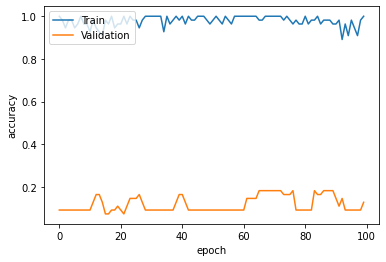

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

Dự đoán là:  200k


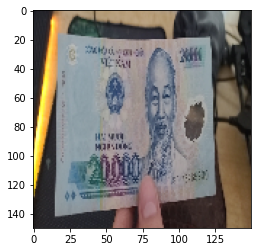

In [ ]:
img = load_img('/content/drive/MyDrive/AI/11_money/predict/20k_test.jpg',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
Label = ['0.2k', '0.5k', '1k','2k','5k','10k','20k','50k','100k','200k','500k']
print('Dự đoán là: ',Label[int(np.argmax(model_Money.predict(img),axis=-1))])